##                                Accusaga Data science Assignment

In [1]:
#Step 1: Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Step 2: Loading the Dataset
df=pd.read_csv('DS_dataset.csv')
df

,Customer_ID,Var1,Var2,Group,Category,Rating,Purchased_ABC_product
0,5518,41.534,12.123,G1,C1,Bronze,0
1,40515,9.445,0.256,G1,C1,Bronze,0
2,52697,37.599,3.199,G1,C2,Gold,0
3,68202,81.514,1.645,G1,C1,Silver,0
4,130003,46.805,1.706,G1,C1,Silver,0
...,...,...,...,...,...,...,...
30824,7047231,12.094,0.899,G5,C3,Bronze,1
30825,7079889,43.214,6.484,G5,C1,Bronze,1
30826,7155901,20.902,6.159,G5,C1,Bronze,1
30827,7180919,11.443,0.000,G5,C3,Bronze,0


### Exploratory Data Analysis: 

In [3]:
# checking data info which gives us the information about number of values present in each column and data type of each column
df.info()
#our dataset contain 30829 rows and 7 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  object 
 4   Category               30829 non-null  object 
 5   Rating                 30829 non-null  object 
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 1.6+ MB


In [4]:
# checkinh null values count
df.isnull().sum()
# There is no missing values

Customer_ID              0
Var1                     0
Var2                     0
Group                    0
Category                 0
Rating                   0
Purchased_ABC_product    0
dtype: int64

In [5]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
0,Group,8
1,Category,5
2,Rating,3


In [6]:
# checking unique values in all Coumns in category
for i in df:
    print(i,df[i].unique())
    print('-------------')

Customer_ID [   5518   40515   52697 ... 7155901 7180919 7182208]
-------------
Var1 [41.534  9.445 37.599 ...  6.524 43.214 18.485]
-------------
Var2 [12.123  0.256  3.199 ...  0.798 17.258  6.589]
-------------
Group ['G1' 'G2' 'G3' 'G4' 'G5' 'G6' 'G7' 'G8']
-------------
Category ['C1' 'C2' 'C3' 'C4' 'C5']
-------------
Rating ['Bronze' 'Gold' 'Silver']
-------------
Purchased_ABC_product [0 1]
-------------


In [7]:
df.Rating.value_counts()
# Different rating count as per Bronze,silver,Gold

Bronze    15127
Silver    10171
Gold       5531
Name: Rating, dtype: int64

<AxesSubplot:xlabel='Rating', ylabel='count'>

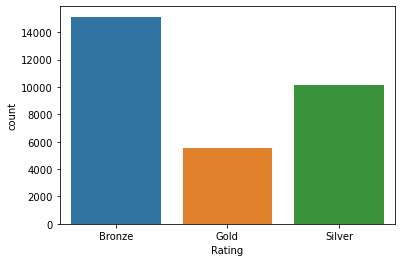

In [8]:
sns.countplot(df['Rating'])
# count of Bronze 15127 which is high

In [9]:
df.columns

Index(['Customer_ID', 'Var1', 'Var2', 'Group', 'Category', 'Rating',
       'Purchased_ABC_product'],
      dtype='object')

<AxesSubplot:xlabel='Group', ylabel='count'>

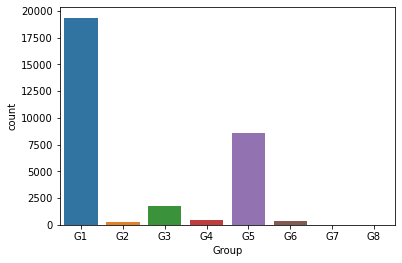

In [10]:
sns.countplot(df['Group'])
# count of group g1 having high count

<AxesSubplot:xlabel='Category', ylabel='count'>

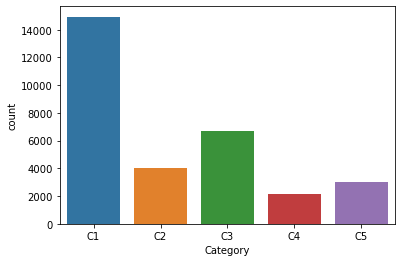

In [11]:
sns.countplot(df['Category'])
# category c1 having high count

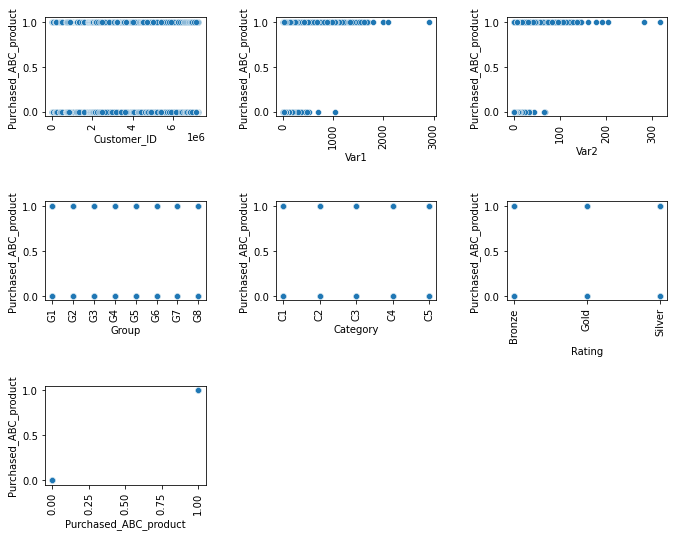

In [12]:
c=1
plt.figure(figsize=(10,15))

for i in df:
    plt.subplot(6,3,c)
    sns.scatterplot(x=df[i],y=df.Purchased_ABC_product)
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()
# We will now compare the independent features with ‘Price’ column, to check the impact on ‘Price’.

<AxesSubplot:xlabel='Rating', ylabel='count'>

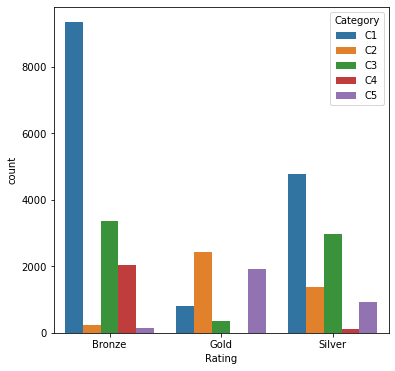

In [13]:
f, ax = plt.subplots(figsize=(6,  6))
sns.countplot(x='Rating',hue='Category',data=df)
# count of category c1 having bronze rating highest.

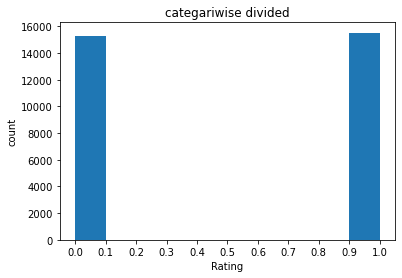

In [14]:
count,bin_edges=np.histogram(df['Purchased_ABC_product'])
df['Purchased_ABC_product'].plot(kind='hist',xticks=bin_edges)
plt.title('categariwise divided')
plt.ylabel('count')
plt.xlabel('Rating')
plt.show()
# so our target column is equal and balance data type 

In [51]:
df.Purchased_ABC_product.value_counts()

1    15524
0    15305
Name: Purchased_ABC_product, dtype: int64

### Encoding the categorical Data

In [15]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Group', 'Category', 'Rating'], dtype='object')


In [16]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30829 entries, 0 to 30828
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            30829 non-null  int64  
 1   Var1                   30829 non-null  float64
 2   Var2                   30829 non-null  float64
 3   Group                  30829 non-null  int32  
 4   Category               30829 non-null  int32  
 5   Rating                 30829 non-null  int32  
 6   Purchased_ABC_product  30829 non-null  int64  
dtypes: float64(2), int32(3), int64(2)
memory usage: 1.3 MB
None


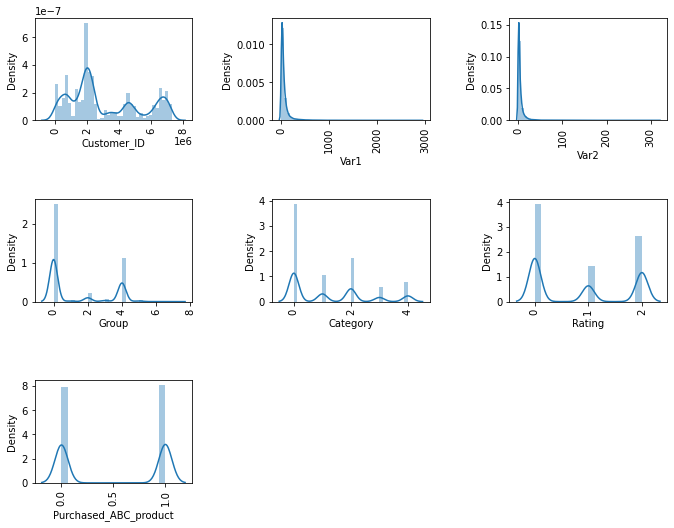

In [17]:
c=1
plt.figure(figsize=(10,15))

for i in df:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c=c+1
plt.show()
#We now plot distribution plots to check the distribution in numerical data

<AxesSubplot:>

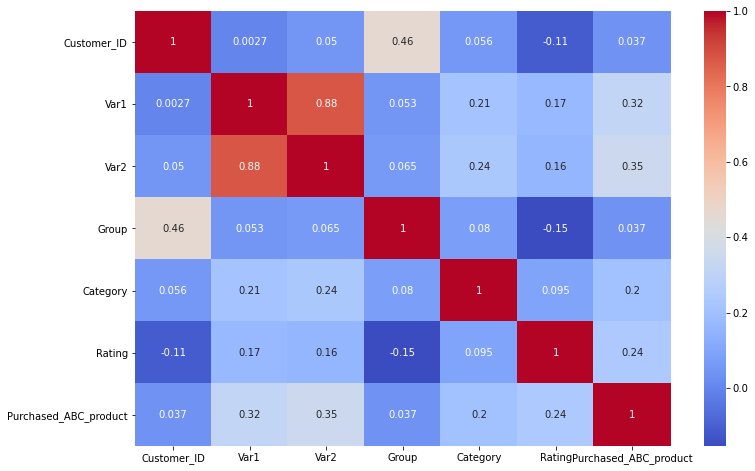

In [18]:
corr=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
# almost all columns having good correlation.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabe

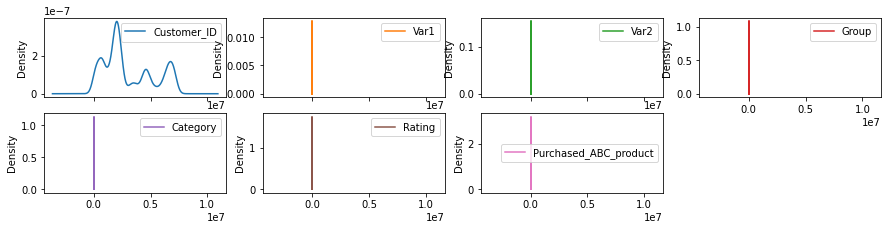

In [19]:
#to check Distribution of skewness
df.plot(kind='kde',subplots=True,layout=(7,4),figsize=(15,12))

In [20]:
df.skew()
# we are not dealing with skewed data because our dataset plays more role to target column

Customer_ID              0.565621
Var1                     5.965916
Var2                     7.307417
Group                    0.734074
Category                 0.811260
Rating                   0.319959
Purchased_ABC_product   -0.014208
dtype: float64

Customer_ID                 AxesSubplot(0.125,0.816017;0.168478x0.0639831)
Var1                     AxesSubplot(0.327174,0.816017;0.168478x0.0639831)
Var2                     AxesSubplot(0.529348,0.816017;0.168478x0.0639831)
Group                    AxesSubplot(0.731522,0.816017;0.168478x0.0639831)
Category                    AxesSubplot(0.125,0.739237;0.168478x0.0639831)
Rating                   AxesSubplot(0.327174,0.739237;0.168478x0.0639831)
Purchased_ABC_product    AxesSubplot(0.529348,0.739237;0.168478x0.0639831)
dtype: object

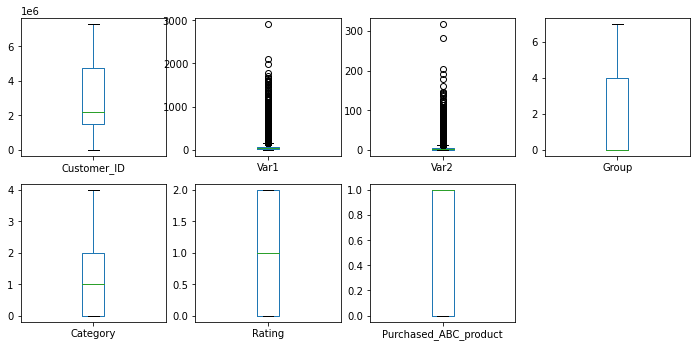

In [21]:
df.plot(kind='box',subplots=True,layout=(10,4),figsize=(12,30)) 
#checking Outlier ,so our data is not haveing any outlier except Var1,Var2

### Train Test Split:# Dividing the dataset into independent and dependent data before scaling

In [22]:
ds_x=df.drop('Purchased_ABC_product',axis=1)
y=df['Purchased_ABC_product']

### import libraries for model devloping .

In [23]:
# import libraries for model devloping .
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

### Scaling the Data

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
dataset=sc.fit_transform(ds_x)

x=pd.DataFrame(dataset,columns=ds_x.columns)

### PCA-Principle Component Analysis:
When you have huge number of features, one way to reduce the number of features and probably avoid overfitting is using a feature reduction method such as PCA.

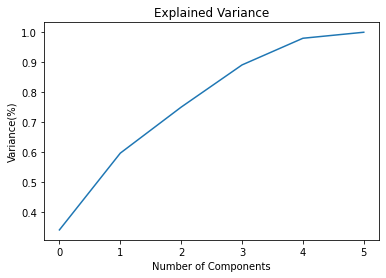

In [25]:
from sklearn.decomposition import PCA
pca=PCA()
pc=pca.fit_transform(x)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)')# for each component
plt.title('Explained Variance')
plt.show()

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)
print(x.shape,x_train.shape,x_test.shape)
print(y.shape,y_train.shape,y_test.shape)

(30829, 6) (24663, 6) (6166, 6)
(30829,) (24663,) (6166,)


### Model 1 =LogisticRegression

In [27]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [28]:
pred=lg.predict(x_test)

In [29]:
print('Accuracy Score :',accuracy_score(y_test,pred))

Accuracy Score : 0.7552708400908207


In [30]:
print(confusion_matrix(y_test,pred))

[[2601  501]
 [1008 2056]]


In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.72      0.84      0.78      3102
           1       0.80      0.67      0.73      3064

    accuracy                           0.76      6166
   macro avg       0.76      0.75      0.75      6166
weighted avg       0.76      0.76      0.75      6166



In [32]:
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.20)
    lg.fit(x_train,y_train)
    pred_train=lg.predict(x_train)
    pred_test=lg.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print("At random state",i,"The model perform very well")
        print("At random_state:-",i)
        print("Accuracy_Score_train :-",accuracy_score(y_train,pred_train)*100)
        print("Accuracy_Score_test :-",accuracy_score(y_test,pred_test)*100)

At random state 8 The model perform very well
At random_state:- 8
Accuracy_Score_train :- 74.53270080687669
Accuracy_Score_test :- 74.50535192993837
At random state 22 The model perform very well
At random_state:- 22
Accuracy_Score_train :- 74.56513806106312
Accuracy_Score_test :- 74.58644177748945
At random state 72 The model perform very well
At random_state:- 72
Accuracy_Score_train :- 74.56108340428983
Accuracy_Score_test :- 74.58644177748945
At random state 77 The model perform very well
At random_state:- 77
Accuracy_Score_train :- 74.64217653975591
Accuracy_Score_test :- 74.61887771650989
At random state 86 The model perform very well
At random_state:- 86
Accuracy_Score_train :- 74.55702874751651
Accuracy_Score_test :- 74.55400583846902
At random state 89 The model perform very well
At random_state:- 89
Accuracy_Score_train :- 74.61379394234278
Accuracy_Score_test :- 74.58644177748945
At random state 94 The model perform very well
At random_state:- 94
Accuracy_Score_train :- 74.6

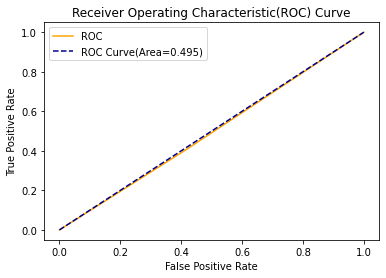

In [33]:
auc=roc_auc_score(y_test,pred)
fpr,tpr,thresholds=roc_curve(y_test,pred)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Model 2 - Ensemble method :RandomForestClassifier

In [34]:
# Bagging & Boosting:
# We further try fitting the data to classification models to check how our ensemble models perform on the given dataset.
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [35]:
parameters={'n_estimators':[100],'criterion':['gini','entropy']}
rf=RandomForestClassifier()

clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'criterion': 'entropy', 'n_estimators': 100}
0.7553824738930708


In [36]:
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
#rf.RandomForestClassifier()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7492701913720402
[[2165  843]
 [ 703 2455]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      3008
           1       0.74      0.78      0.76      3158

    accuracy                           0.75      6166
   macro avg       0.75      0.75      0.75      6166
weighted avg       0.75      0.75      0.75      6166



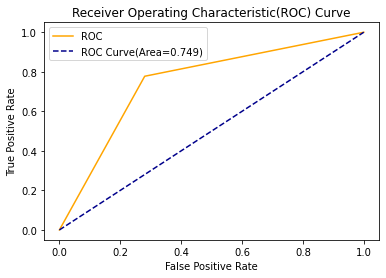

In [37]:
auc=roc_auc_score(y_test,predrf)
fpr,tpr,thresholds=roc_curve(y_test,predrf)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Model 3 - Ensemble method :AdaBoostClassifier
        Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [38]:
parameters={'n_estimators':[50],'algorithm':['SAMME','SAMME.R']}
ad=AdaBoostClassifier()

clf=GridSearchCV(ad,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'algorithm': 'SAMME.R', 'n_estimators': 50}
0.7624780657731691


In [39]:
ad=AdaBoostClassifier(n_estimators=50,algorithm='SAMME.R')
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7588387933830685
[[2135  873]
 [ 614 2544]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74      3008
           1       0.74      0.81      0.77      3158

    accuracy                           0.76      6166
   macro avg       0.76      0.76      0.76      6166
weighted avg       0.76      0.76      0.76      6166



In [40]:
#k-fold cross_validation_ score
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.757217   0.7684074  0.76208239 0.7555952  0.76723439]
0.7621072732529248
0.005143955146973495


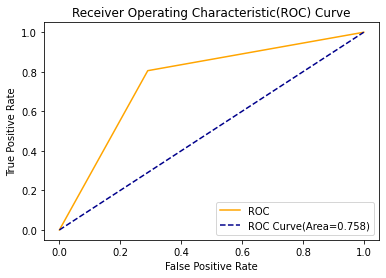

In [41]:
auc=roc_auc_score(y_test,predad)
fpr,tpr,thresholds=roc_curve(y_test,predad)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

### Model 4 - Ensemble method :GradientBoostingClassifier
        Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [42]:
parameters={'loss':['deviance','exponential'],'criterion':['friedman_mse','squared_error']}
gd=GradientBoostingClassifier()

clf=GridSearchCV(gd,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)
best_result=clf.best_score_
print(best_result)

{'criterion': 'friedman_mse', 'loss': 'exponential'}
0.767586716337939


In [43]:
gd=GradientBoostingClassifier(criterion='friedman_mse',loss='deviance')

gd.fit(x_train,y_train)
gd.score(x_train,y_train)
predgd=gd.predict(x_test)
print(accuracy_score(y_test,predgd))
print(confusion_matrix(y_test,predgd))
print(classification_report(y_test,predgd))

0.7648394421018488
[[2173  835]
 [ 615 2543]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      3008
           1       0.75      0.81      0.78      3158

    accuracy                           0.76      6166
   macro avg       0.77      0.76      0.76      6166
weighted avg       0.77      0.76      0.76      6166



In [44]:
from sklearn.model_selection import KFold

score=cross_val_score(gd,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76256893 0.77651638 0.76451508 0.76273111 0.76999189]
0.7672646769993415
0.005351547597010499


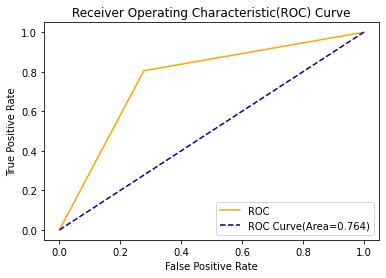

In [45]:
auc=roc_auc_score(y_test,predgd)
fpr,tpr,thresholds=roc_curve(y_test,predgd)

plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC Curve(Area=%0.3f)'%auc)
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic(ROC) Curve")
plt.legend()
plt.show()

###  DecisionTreeClassifier :Hyperparameter Tuning:GRidSearch CV,Model Development,Cross validation

In [46]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()

grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)                       
best_result=gd_sr.best_score_
print(best_result)
print(round(best_result,2))

{'criterion': 'entropy'}
0.7052448834476484
0.71


### Support Vector classifier

In [47]:
# Support Vector classifier
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.737755433019786
[[2462  546]
 [1071 2087]]
              precision    recall  f1-score   support

           0       0.70      0.82      0.75      3008
           1       0.79      0.66      0.72      3158

    accuracy                           0.74      6166
   macro avg       0.74      0.74      0.74      6166
weighted avg       0.75      0.74      0.74      6166



### gd=GradientBoostingClassifier()
 we are getting gd model accuracy 76% Cross validation Score 76% Hyperparameter tuning Grid Search CV Score 76% which is best.so our model performing extremely well.

 since cross validation score accuracy score and AUC ROc Score are almost same.we are heading with a good approach.

### Saving Best Model

In [48]:
# We further proceed to test the object that we saved using joblib or pickle, and create a dataframe of predicted values. 
import pickle 
filename='Customer_Churn_Analysis.pkl'
pickle.dump(gd,open(filename,'wb'))

### Conclusion:

In [49]:
# Following are the results that we achieve, with an accuracy of 76%.
import numpy as np
a=np.array(y_test)
predicted=np.array(gd.predict(x_test))
dfs=pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))
dfs

,Original,Predicted
0,0,0
1,0,0
2,1,1
3,0,1
4,1,1
...,...,...
6161,0,0
6162,1,1
6163,0,0
6164,0,0


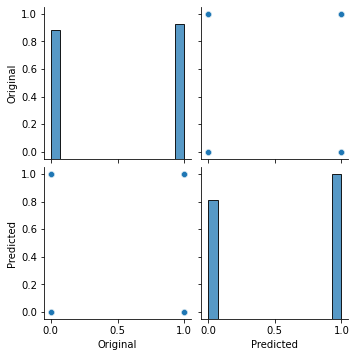

In [50]:
# This marks the end of our process.
# we have successfully trained our model to predict the customer data from  Sample Data Sets with the aim of building and 
#comparing several customer churn prediction models with an accuracy of ~76%
sns.pairplot(dfs)

## Thank You !!!! 